In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-33.30244679133749, -12.935773907698945),
 (2.1781884237192344, 14.235505816638437),
 (77.27940370195216, -107.70443585164921),
 (-75.26996782645826, 155.17004514840096),
 (19.711462597555055, 59.97721282610701),
 (65.06302151584981, 148.4769765034515),
 (-60.878016928827066, 13.927382708285705),
 (-48.04798229006029, 101.50415021817645),
 (-32.000495112696505, -177.90441493256185),
 (-69.14437531322935, 167.34278586681677),
 (73.29555311158862, 55.92652466281535),
 (-30.07696771987868, 66.51657435971663),
 (-6.042819313351913, 19.926607948728133),
 (-79.6535165835776, 105.56882597966609),
 (-68.52094061932905, -161.21221130467322),
 (-50.87936945320293, 172.96904440383054),
 (6.56412634779754, 161.76993594316576),
 (8.801355212367682, -159.6569319428085),
 (45.914766759035984, -65.68021610328734),
 (-63.9631037900818, 21.152457835987434),
 (-38.36425767643708, -161.19242165656968),
 (-39.322851969498565, -83.5559245817322),
 (12.691422643951938, 2.7450138572429807),
 (47.58675197380

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10ec51f53fab2eb780ceb0558541a08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | sembe
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sur
Processing Record 6 of Set 1 | shirokiy
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | tshikapa
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | sussex
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | say
Processing Record 23 of Set 1 | beth

Processing Record 39 of Set 4 | deniliquin
Processing Record 40 of Set 4 | altay
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | japura
Processing Record 43 of Set 4 | dryden
Processing Record 44 of Set 4 | sao desiderio
Processing Record 45 of Set 4 | floro
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | port lavaca
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | makakilo city
Processing Record 1 of Set 5 | sirajganj
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | nokaneng
Processing Record 4 of Set 5 | la esperanza
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | merauke
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | nueve de julio
Processing Record 9 of Set 5 | paamiut
Processing Record 10 of Set 5 | brufut
Processing Record 11 of Set 5 | kaspiysk
Processing Record 12 of Set 5 | salta
Processing Record 1

Processing Record 34 of Set 8 | qui nhon
Processing Record 35 of Set 8 | severo-yeniseyskiy
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | betong
Processing Record 38 of Set 8 | georgetown
Processing Record 39 of Set 8 | capitao poco
Processing Record 40 of Set 8 | nouadhibou
Processing Record 41 of Set 8 | srandakan
Processing Record 42 of Set 8 | sao joao da barra
Processing Record 43 of Set 8 | kyzyl
Processing Record 44 of Set 8 | bardiyah
Processing Record 45 of Set 8 | springbok
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Processing Record 47 of Set 8 | kazerun
Processing Record 48 of Set 8 | great yarmouth
Processing Record 49 of Set 8 | bocas del toro
Processing Record 50 of Set 8 | begunitsy
Processing Record 1 of Set 9 | punta gorda
Processing Record 2 of Set 9 | bintulu
Processing Record 3 of Set 9 | vila franca do campo
Processing Record 4 of Set 9 | barawe
City not found. Skipping...
Processing Record 5 of Set 9 | porto sant

Processing Record 15 of Set 12 | kasamwa
Processing Record 16 of Set 12 | davila
Processing Record 17 of Set 12 | mao
Processing Record 18 of Set 12 | poum
Processing Record 19 of Set 12 | coueron
Processing Record 20 of Set 12 | luau
Processing Record 21 of Set 12 | fairview
Processing Record 22 of Set 12 | great bend
Processing Record 23 of Set 12 | inhambane
Processing Record 24 of Set 12 | bandar-e lengeh
Processing Record 25 of Set 12 | anamur
Processing Record 26 of Set 12 | the valley
Processing Record 27 of Set 12 | montrose
Processing Record 28 of Set 12 | gabu
Processing Record 29 of Set 12 | pobe
Processing Record 30 of Set 12 | ponta do sol
Processing Record 31 of Set 12 | satitoa
City not found. Skipping...
Processing Record 32 of Set 12 | santa cruz
Processing Record 33 of Set 12 | najran
Processing Record 34 of Set 12 | ingham
Processing Record 35 of Set 12 | savannah bight
Processing Record 36 of Set 12 | jacksonville beach
Processing Record 37 of Set 12 | wahiawa
Proce

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,82.09,63,75,5.01,US,2021-08-07 17:03:26
1,Sembe,1.6481,14.5806,74.43,83,91,3.20,CG,2021-08-07 17:03:26
2,Yellowknife,62.4560,-114.3525,57.56,93,100,14.41,CA,2021-08-07 17:01:27
3,Bluff,-46.6000,168.3333,34.81,67,100,6.76,NZ,2021-08-07 17:03:27
4,Sur,22.5667,59.5289,92.03,52,98,9.75,OM,2021-08-07 17:03:27
5,Shirokiy,49.7580,129.5230,61.02,98,68,10.16,RU,2021-08-07 17:03:27
6,Hermanus,-34.4187,19.2345,53.91,77,100,0.63,ZA,2021-08-07 17:03:28
7,Busselton,-33.6500,115.3333,58.08,92,100,14.12,AU,2021-08-07 17:03:28
8,Vaini,-21.2000,-175.2000,70.20,59,8,11.48,TO,2021-08-07 17:03:28
9,Mahebourg,-20.4081,57.7000,71.26,71,10,14.09,MU,2021-08-07 17:01:11


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-08-07 17:03:26,42.0970,-79.2353,82.09,63,75,5.01
1,Sembe,CG,2021-08-07 17:03:26,1.6481,14.5806,74.43,83,91,3.20
2,Yellowknife,CA,2021-08-07 17:01:27,62.4560,-114.3525,57.56,93,100,14.41
3,Bluff,NZ,2021-08-07 17:03:27,-46.6000,168.3333,34.81,67,100,6.76
4,Sur,OM,2021-08-07 17:03:27,22.5667,59.5289,92.03,52,98,9.75
5,Shirokiy,RU,2021-08-07 17:03:27,49.7580,129.5230,61.02,98,68,10.16
6,Hermanus,ZA,2021-08-07 17:03:28,-34.4187,19.2345,53.91,77,100,0.63
7,Busselton,AU,2021-08-07 17:03:28,-33.6500,115.3333,58.08,92,100,14.12
8,Vaini,TO,2021-08-07 17:03:28,-21.2000,-175.2000,70.20,59,8,11.48
9,Mahebourg,MU,2021-08-07 17:01:11,-20.4081,57.7000,71.26,71,10,14.09


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

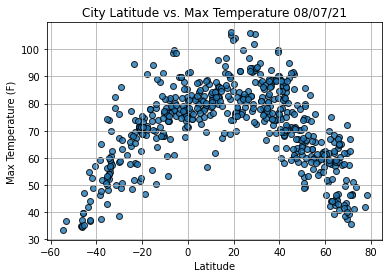

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

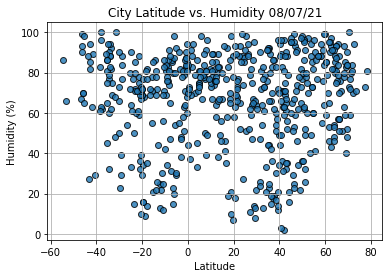

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

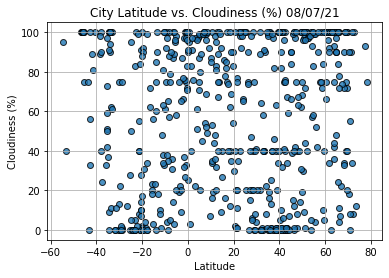

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

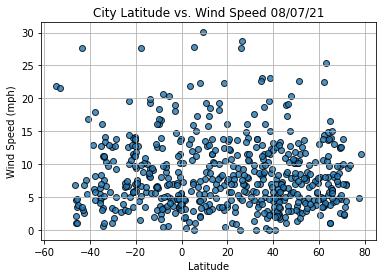

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                   Kaitangata
Lat                      -46.2817
Lng                      169.8464
Max Temp                    37.29
Humidity                       90
Cloudiness                    100
Wind Speed                   4.54
Country                        NZ
Date          2021-08-07 17:03:30
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
558     True
559    False
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,82.09,63,75,5.01,US,2021-08-07 17:03:26
1,Sembe,1.6481,14.5806,74.43,83,91,3.20,CG,2021-08-07 17:03:26
2,Yellowknife,62.4560,-114.3525,57.56,93,100,14.41,CA,2021-08-07 17:01:27
4,Sur,22.5667,59.5289,92.03,52,98,9.75,OM,2021-08-07 17:03:27
5,Shirokiy,49.7580,129.5230,61.02,98,68,10.16,RU,2021-08-07 17:03:27


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

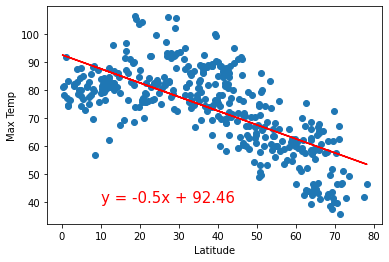

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

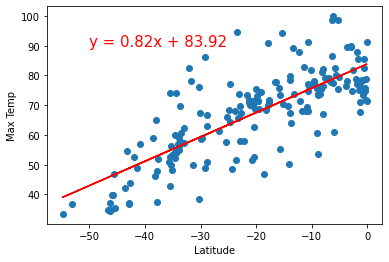

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

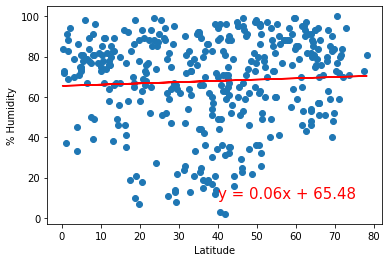

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

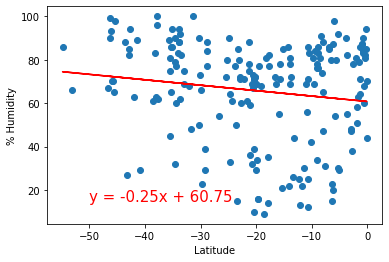

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

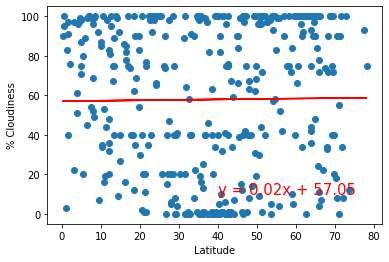

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

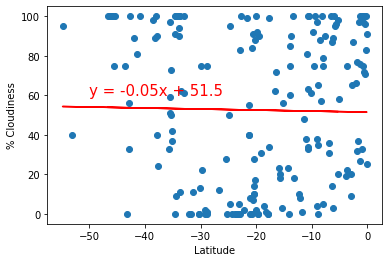

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

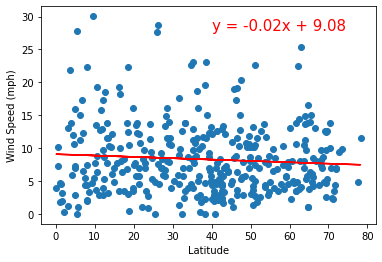

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,28))

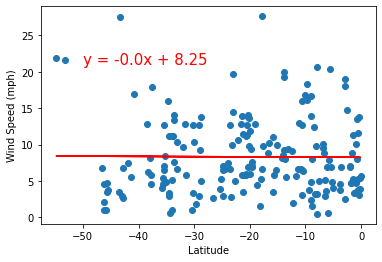

In [127]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,21))